In [12]:
pip install pytorch-forecasting


  Using cached pytorch_forecasting-1.2.0-py3-none-any.whl.metadata (13 kB)
  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached lightning-2.5.0.post0-py3-none-any.whl.metadata (40 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached lightning_utilities-0.11.9-py3-none-any.whl.metadata (5.2 kB)
  Using cached torchmetrics-1.6.1-py3-none-any.whl.metadata (21 kB)
  Using cached pytorch_lightning-2.5.0.post0-py3-none-any.whl.metadata (21 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached aiohttp-3.11.11-cp312

In [ ]:
pip install ipywidgets

In [242]:
import warnings

warnings.filterwarnings("ignore")  # avoid printing out absolute p

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [25]:
Dollar_Index = pd.read_csv("../Datasetsv2/preprocessed/Dollar_Index_Preprocessed.csv")
Gold = pd.read_csv("../Datasetsv2/preprocessed/Gold_Preprocessed.csv")
Interest_Rate = pd.read_csv("../Datasetsv2/preprocessed/Interest_Rate_Preprocessed.csv")
US_10_Year = pd.read_csv("../Datasetsv2/preprocessed/US_10_Year_Preprocessed.csv")
VIX_Data = pd.read_csv("../Datasetsv2/preprocessed/VIX_Data_Preprocessed.csv")

In [10]:
VIX_Data.head()

,Date,VIX_Value
0,2015-01-09,17.55
1,2015-01-10,17.55
2,2015-01-11,17.55
3,2015-01-12,19.60
4,2015-01-13,20.56


In [11]:
Exogenous_Variables = Dollar_Index.merge(Gold, on="Date", how="outer") \
                        .merge(Interest_Rate, on="Date", how="outer") \
                        .merge(US_10_Year, on="Date", how="outer") \
                        .merge(VIX_Data, on="Date", how="outer")

In [12]:
Exogenous_Variables

,Date,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value
0,2015-01-09,91.940002,1211.2500,0.12,1.950,17.55
1,2015-01-10,91.940002,1211.2500,0.12,1.950,17.55
2,2015-01-11,91.940002,1211.2500,0.12,1.950,17.55
3,2015-01-12,91.980003,1222.0000,0.12,1.909,19.60
4,2015-01-13,92.309998,1239.0000,0.12,1.905,20.56
...,...,...,...,...,...,...
3649,2025-01-05,108.949997,2640.1664,4.33,4.601,16.13
3650,2025-01-06,108.260002,2635.8796,4.33,4.623,16.04
3651,2025-01-07,108.540001,2648.7119,4.33,4.684,17.82
3652,2025-01-08,109.089996,2661.5352,4.33,4.692,17.70


In [13]:
# Set 'date' as index
Exogenous_Variables.set_index("Date", inplace=True)

In [14]:
# Save the merged dataset
Exogenous_Variables.to_csv("../Datasetsv2/Exogenous/Exogenous_Variables.csv")

In [4]:
# download bitcoin data
start_date = "2015-01-09"
end_date = "2025-01-10"
BTC_USD = yf.download("BTC-USD", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
BTC_USD

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-09,290.407990,291.114014,280.532990,282.382996,18718600
2015-01-10,274.795990,288.127014,273.966003,287.303009,15264300
2015-01-11,265.660004,279.638000,265.039001,274.608002,18200800
2015-01-12,267.795990,272.203003,265.200012,266.145996,18880300
2015-01-13,225.860992,268.277008,219.906006,267.394012,72843904
...,...,...,...,...,...
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825
2025-01-06,102078.085938,102482.875000,97926.148438,98314.953125,51823432705


In [6]:
# check for missing values
BTC_USD_Missing = BTC_USD.isnull().any().any()
print(f"Are there any missing values? {BTC_USD_Missing}")

Are there any missing values? False


In [7]:
BTC_USD.rename(columns={'Close': 'BTC_Price'}, inplace=True)

In [8]:
BTC_USD = BTC_USD.drop(columns=['High', 'Low', 'Open', 'Volume'])

In [9]:
BTC_USD.dtypes

Price      Ticker 
BTC_Price  BTC-USD    float64
dtype: object

In [16]:
BTC_USD.head()

Price,BTC_Price
Date,
2015-01-09,290.407990
2015-01-10,274.795990
2015-01-11,265.660004
2015-01-12,267.795990
2015-01-13,225.860992


In [15]:
BTC_USD.columns = BTC_USD.columns.droplevel(1)

In [17]:
BTC_USD.to_csv("BTC_USD.csv", index=True)

In [18]:
BTC_USD = pd.read_csv('../Datasetsv2/BTC_USD.csv')

In [19]:
BTC_USD.head()

,Date,BTC_Price
0,2015-01-09,290.407990
1,2015-01-10,274.795990
2,2015-01-11,265.660004
3,2015-01-12,267.795990
4,2015-01-13,225.860992


In [20]:
BTC_USD['Date'] = pd.to_datetime(BTC_USD['Date'])

In [21]:
BTC_USD.describe()

,Date,BTC_Price
count,3654,3654.000000
mean,2020-01-09 12:00:00,20376.264433
min,2015-01-09 00:00:00,178.102997
25%,2017-07-10 06:00:00,2668.765015
50%,2020-01-09 12:00:00,9713.667480
75%,2022-07-10 18:00:00,32863.615234
max,2025-01-09 00:00:00,106140.601562
std,NaN,22500.082535


In [23]:
BTC_USD.to_csv('../Datasetsv2/preprocessed/BTC_USD_Preprocessed.csv', index=False)

In [24]:
# Now import the preprocessed BTC data set
BTC_USD_Final = pd.read_csv("../Datasetsv2/preprocessed/BTC_USD_Preprocessed.csv")

In [26]:
# import exogenous variables dataset
Exogenous_Variables_Final = pd.read_csv("../Datasetsv2/Exogenous/Exogenous_Variables.csv")

In [27]:
# combine both datasets
Final_Dataset = BTC_USD_Final.merge(Exogenous_Variables_Final, on="Date", how="outer")

In [28]:
Final_Dataset.head()

,Date,BTC_Price,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value
0,2015-01-09,290.407990,91.940002,1211.25,0.12,1.950,17.55
1,2015-01-10,274.795990,91.940002,1211.25,0.12,1.950,17.55
2,2015-01-11,265.660004,91.940002,1211.25,0.12,1.950,17.55
3,2015-01-12,267.795990,91.980003,1222.00,0.12,1.909,19.60
4,2015-01-13,225.860992,92.309998,1239.00,0.12,1.905,20.56


In [31]:
# save as a csv
Final_Dataset.to_csv('../Datasetsv2/FinalDataset/Final_Dataset.csv', index=False)

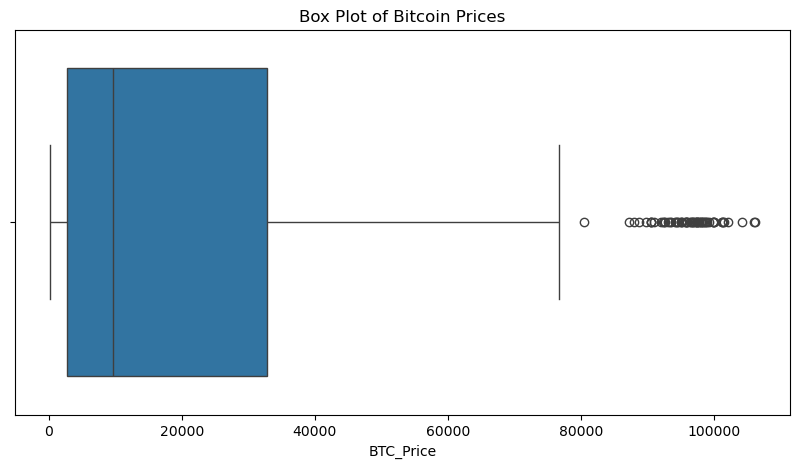

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=Final_Dataset["BTC_Price"])
plt.title("Box Plot of Bitcoin Prices")
plt.show()

In [13]:
pip install optuna

  Using cached optuna-4.2.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.14.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached Mako-1.3.8-py3-none-any.whl.metadata (2.9 kB)
Using cached optuna-4.2.0-py3-none-any.whl (383 kB)
Using cached alembic-1.14.1-py3-none-any.whl (233 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 5.6 MB/s eta 0:00:00
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached Mako-1.3.8-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import pytorch_lightning as pl
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet, Baseline
from pytorch_forecasting.metrics import MAE, RMSE, MAPE, PoissonLoss, QuantileLoss
import pytorch_forecasting
import optuna
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
from pytorch_forecasting.data import GroupNormalizer

from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_forecasting.data.encoders import NaNLabelEncoder
from pytorch_lightning import LightningModule

import lightning.pytorch as pl
from lightning.pytorch.tuner import Tuner

c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\pytorch_forecasting\models\base_model.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# import saved cdv
Final_Dataset = pd.read_csv("../Datasetsv2/FinalDataset/Final_Dataset.csv")

In [3]:
Final_Dataset.dtypes

Date              object
BTC_Price        float64
Dollar_Index     float64
Gold_Price       float64
Interest_Rate    float64
US_10_Year       float64
VIX_Value        float64
dtype: object

In [4]:
Final_Dataset['Date'] = pd.to_datetime(Final_Dataset['Date'])

In [5]:
Final_Dataset['id'] = "BTC"

In [6]:
Final_Dataset

,Date,BTC_Price,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,id
0,2015-01-09,290.407990,91.940002,1211.2500,0.12,1.950,17.55,BTC
1,2015-01-10,274.795990,91.940002,1211.2500,0.12,1.950,17.55,BTC
2,2015-01-11,265.660004,91.940002,1211.2500,0.12,1.950,17.55,BTC
3,2015-01-12,267.795990,91.980003,1222.0000,0.12,1.909,19.60,BTC
4,2015-01-13,225.860992,92.309998,1239.0000,0.12,1.905,20.56,BTC
...,...,...,...,...,...,...,...,...
3649,2025-01-05,98314.960938,108.949997,2640.1664,4.33,4.601,16.13,BTC
3650,2025-01-06,102078.085938,108.260002,2635.8796,4.33,4.623,16.04,BTC
3651,2025-01-07,96922.703125,108.540001,2648.7119,4.33,4.684,17.82,BTC
3652,2025-01-08,95043.523438,109.089996,2661.5352,4.33,4.692,17.70,BTC


In [7]:
# Define dataset parameters
Final_Dataset['time_idx'] = Final_Dataset.index
max_prediction_length = 7  # Set to desired prediction length
max_encoder_length = 30  # Set to desired history length (e.g., 30 days) - pass 30 days are used to predict next 7 days
batch_size = 64
training_cutoff = Final_Dataset['time_idx'].max() - max_prediction_length

In [8]:
Final_Dataset

,Date,BTC_Price,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,id,time_idx
0,2015-01-09,290.407990,91.940002,1211.2500,0.12,1.950,17.55,BTC,0
1,2015-01-10,274.795990,91.940002,1211.2500,0.12,1.950,17.55,BTC,1
2,2015-01-11,265.660004,91.940002,1211.2500,0.12,1.950,17.55,BTC,2
3,2015-01-12,267.795990,91.980003,1222.0000,0.12,1.909,19.60,BTC,3
4,2015-01-13,225.860992,92.309998,1239.0000,0.12,1.905,20.56,BTC,4
...,...,...,...,...,...,...,...,...,...
3649,2025-01-05,98314.960938,108.949997,2640.1664,4.33,4.601,16.13,BTC,3649
3650,2025-01-06,102078.085938,108.260002,2635.8796,4.33,4.623,16.04,BTC,3650
3651,2025-01-07,96922.703125,108.540001,2648.7119,4.33,4.684,17.82,BTC,3651
3652,2025-01-08,95043.523438,109.089996,2661.5352,4.33,4.692,17.70,BTC,3652


In [9]:
# add additional features
Final_Dataset["month"] = Final_Dataset.Date.dt.month.astype(str).astype("category")  # categories have be strings

Final_Dataset

,Date,BTC_Price,Dollar_Index,Gold_Price,Interest_Rate,US_10_Year,VIX_Value,id,time_idx,month
0,2015-01-09,290.407990,91.940002,1211.2500,0.12,1.950,17.55,BTC,0,1
1,2015-01-10,274.795990,91.940002,1211.2500,0.12,1.950,17.55,BTC,1,1
2,2015-01-11,265.660004,91.940002,1211.2500,0.12,1.950,17.55,BTC,2,1
3,2015-01-12,267.795990,91.980003,1222.0000,0.12,1.909,19.60,BTC,3,1
4,2015-01-13,225.860992,92.309998,1239.0000,0.12,1.905,20.56,BTC,4,1
...,...,...,...,...,...,...,...,...,...,...
3649,2025-01-05,98314.960938,108.949997,2640.1664,4.33,4.601,16.13,BTC,3649,1
3650,2025-01-06,102078.085938,108.260002,2635.8796,4.33,4.623,16.04,BTC,3650,1
3651,2025-01-07,96922.703125,108.540001,2648.7119,4.33,4.684,17.82,BTC,3651,1
3652,2025-01-08,95043.523438,109.089996,2661.5352,4.33,4.692,17.70,BTC,3652,1


In [10]:
# Check for NaN values in the 'time_idx' column
nan_time_idx = Final_Dataset['time_idx'].isnull().sum()
print(f"NaN values in 'time_idx': {nan_time_idx}")

NaN values in 'time_idx': 0


In [25]:
time_varying_known_reals=list(Final_Dataset.columns.difference(['BTC_Price', 'time_idx', 'id']))

In [11]:

training = TimeSeriesDataSet(
    Final_Dataset[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="BTC_Price",
    group_ids=["id"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    static_reals=[],
    time_varying_known_categoricals=[],
    time_varying_known_reals=list(Final_Dataset.columns.difference(['BTC_Price', 'time_idx', 'id'])),
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=["BTC_Price"],
    target_normalizer=GroupNormalizer(
        groups=["id"], transformation="softplus"
    ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(training, Final_Dataset, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 64  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [12]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
MAE()(baseline_predictions.output, baseline_predictions.y)

C:\Users\Sathmika\AppData\Local\Temp\ipykernel_18572\2174382858.py:2: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is installed, in order to minimize the number of dependencies in default parameter settings. Users who wish to ensure their code continues using 'ranger' as optimizer should ensure that pytorch_optimizer is installed, and set the optimizer parameter explicitly to 'ranger'.
  baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users

tensor(2210.1741)

In [13]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    accelerator="cpu",
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=8,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    loss=QuantileLoss(),
    # optimizer="Ranger", use the default optimizer - adam
    # reduce learning rate if no improvement in validation loss after x epochs
    # reduce_on_plateau_patience=1000,
)
print(f"Number of parameters in network: {tft.size() / 1e3:.1f}k")

Seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Number of parameters in network: 12.0k


c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:171: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is i

c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\loops\utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
Finding best initial lr: 100%|██████████| 100/100 [00:14<00:00,  6.87it/s]
Learning rate set to 0.013489628825916528
Restoring states from the checkpoint path at c:\Us

suggested learning rate: 0.013489628825916528


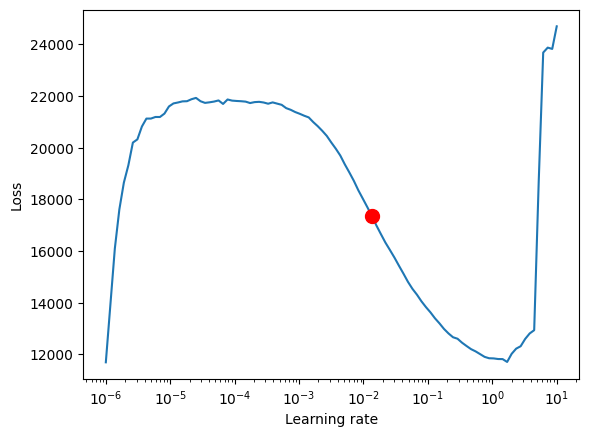

C:\Users\Sathmika\AppData\Local\Temp\ipykernel_18572\603415214.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [14]:
# find the optimal learning rate
res = Tuner(trainer).lr_find(
    tft, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader, max_lr=10.0, min_lr=1e-6
)
# and plot the result - always visually confirm that the suggested learning rate makes sense
print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [31]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached h5py-3.12.1-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached nam

  You can safely remove it manually.
  You can safely remove it manually.


In [40]:
pip install tensorboardX

In [15]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=100,
    accelerator="cpu",
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=50,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=2,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=QuantileLoss(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    # optimizer="Ranger",
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size() / 1e3:.1f}k")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Number of parameters in network: 26.6k


c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\pytorch_forecasting\models\temporal_fusion_transformer\__init__.py:171: UserWarning: In pytorch-forecasting models, on versions 1.1.X, the default optimizer defaults to 'adam', if pytorch_optimizer is not installed, otherwise it defaults to 'ranger' from pytorch_optimizer. From version 1.2.0, the default optimizer will be 'adam' regardless of whether pytorch_optimizer is i

In [16]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)


   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 0      | train
3  | prescalers                         | ModuleDict                      | 192    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K  | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 5.9 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 5.1 K  | train
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K  | train
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K  

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 16: 100%|██████████| 50/50 [00:08<00:00,  5.58it/s, v_num=1, train_loss_step=594.0, val_loss=1.77e+3, train_loss_epoch=695.0]   


In [22]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\utilities\parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [23]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Sathmika\anaconda3\envs\tft\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


{'attention': <Figure size 640x480 with 1 Axes>,
 'static_variables': <Figure size 700x275 with 1 Axes>,
 'encoder_variables': <Figure size 700x425 with 1 Axes>,
 'decoder_variables': <Figure size 700x400 with 1 Axes>}

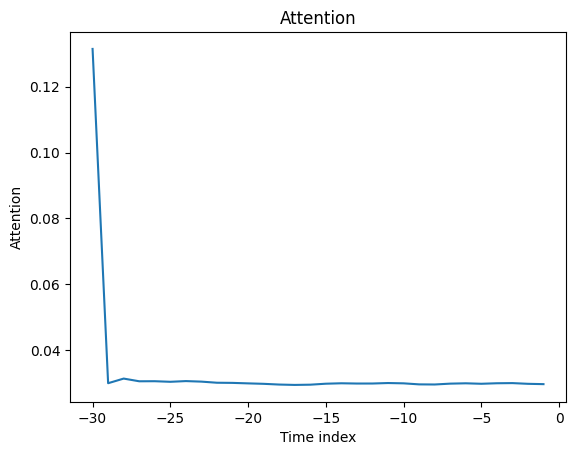

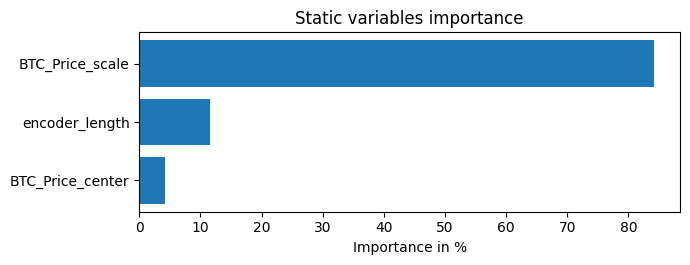

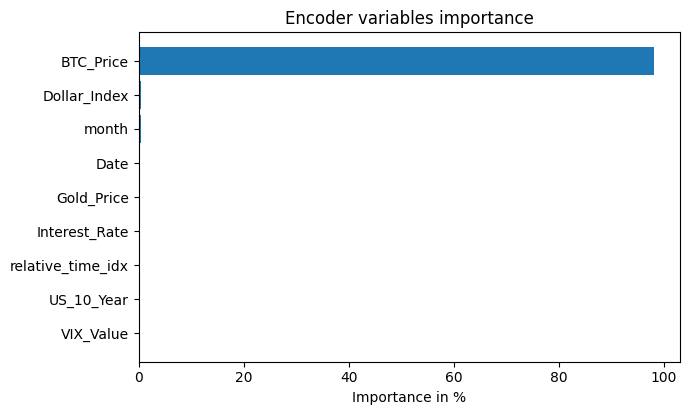

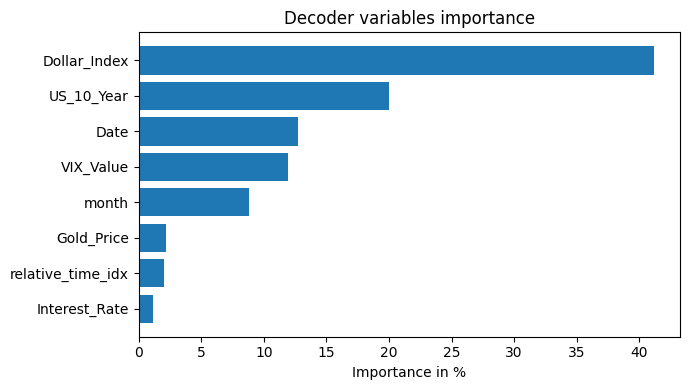

In [24]:
interpretation = best_tft.interpret_output(raw_predictions.output, reduction="sum")
best_tft.plot_interpretation(interpretation)